## ARBOLES DE DECISION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clientes = pd.read_csv("clientes.csv")

# MODELOS DE CLASIFICACION PARA PREDICCIONES

## Obteniendo los datos por filas y haciendo la particion entre datos de entrenamiento y de prueba


In [3]:
x_data = np.array(clientes.iloc[:, 2:clientes.shape[0]])# Omitimos el numero del cliente y el estado de la cuenta
y_data = np.array(clientes["EstadoCuenta"])

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3) #0.3 es la proporcion de division

## DEFINIENDO EL ALGORITMO A UTILIZAR

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
algoritmo = DecisionTreeClassifier(criterion="entropy", max_depth=12) #Criterio = "gini" para cambiar al indice de Gini

## Entrenando el modelo

In [7]:
algoritmo.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [8]:
y_predict = algoritmo.predict(x_test)

----------------------------------------------------------

## Verificando Los Resultados

#### Se busca que los verdaderos negativos sean 100/100 y REDUCIR al maximo los FALSOS NEGATIVOS ya que son personas que aparentemente tienen la cuenta activa pero en realidad la cerraran en un futuro o la tienen cerrada.

C:\Users\Arley\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


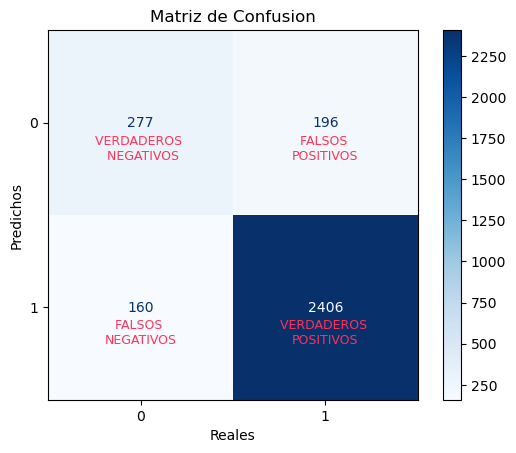

In [9]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

matriz = plot_confusion_matrix(algoritmo, x_test, y_test, cmap=plt.cm.Blues)
matriz.ax_.set_title('Matriz de Confusion')
plt.xlabel('Reales')
plt.ylabel('Predichos')
plt.gcf().axes[0].tick_params()
plt.gcf().axes[1].tick_params()

titulos=[["VERDADEROS \n NEGATIVOS", "FALSOS \nNEGATIVOS"], ["FALSOS \nPOSITIVOS", "VERDADEROS \nPOSITIVOS"]]

for i in range(len(titulos)):
    for j in range(len(titulos)):        
        plt.text(i, j+0.14, titulos[i][j], fontsize=9, ha= "center", va="center", color="#FF3358")

plt.show()

## Precision del Modelo (Respecto a negativos)
Negativos predichos correctamente sobre todos los negativos predichos por la maquina

In [10]:
#Valores de la matriz de confusion
vn, fp, fn, vp = confusion_matrix(y_test, y_predict).ravel()
(vn, fp, fn, vp)

indice_negativos = (vn*100)/(vn+fn)
print(indice_negativos,"%")

63.38672768878718 %


## CONCLUSIONES
* El algoritmo tiene una prediccion baja en cuestion de los resultados negativos.
* El algoritmo no se recomienda en este caso